# **New Product Development - On Coffee**

*Credit: Mohammad Attala Rajafar (2019104824), Intan Amelia Sari (2019104596), M. Dwi Ikhwanuddin (2019104427), Muhammad Rifky (2019104801)*

Kelas : 06PASI

Matakuliah : Data Mining Technique 2

Dosen : Jullend Gatc S.T.,M.Kom.

## Data Summarization

**Latar Belakang**

Saat ini segala macam informasi mengenai suatu tempat sudah sangat mudah untuk didapat, hanya dengan menggunakan laptop atau smartphone dam menekan beberapa tombol dalam website atau aplikasi, kita sudah bisa mengetahui informasi yang kita butuhkan. Apalagi dengan situasi pandemi yang sudah berangsur turun, semua orang pasti menginginkan untuk dapat bersosialisasi seperti keadaan normal dan biasanya tempat berkumpul yang paling dicari adalah di cafe. Maka dari itu kami ingin memanfaatkan teknologi agar dapat menjadi salah satu inovasi dan solusi untuk kebutuhan akan berkumpul bersama orang terdekat/tersayang secara langsung (offline), kami membangun sistem Website On - Coffee sebagai new product development kami.



**Dataset & Sumber Data**


Dataset yang kami gunakan adalah dataset yang berasal dari hasil kuesioner responden yang telah kami buat dan sebar sebelumnya dengan menggunakan platform Google Form. Kami sebar kuesioner ini dari tanggal 22 Mei 2022 yang mendapatkan sebanyak 200 responden dari beragam kalangan usia.

**Berikut adalah screen shoot dari Form yang sudah kami buat**

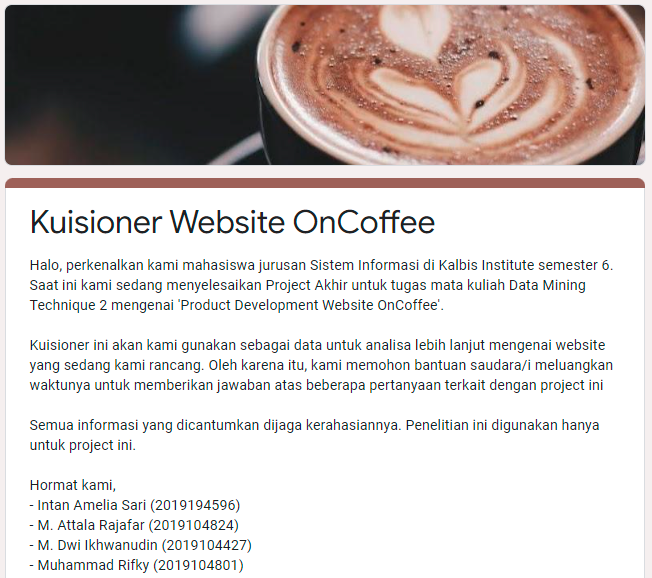

## Data Acquisition

Kami melakukan impot library yang akan kami gunakan untuk analisa website On - Coffee

Library Import

In [1]:
# Library Import
import pandas as pd # Analisis
import numpy as np # Analisis
import matplotlib.pyplot as plt # Visualisasi
import seaborn as sns # Visualisasi
from scipy import stats # Statistik
from sklearn.cluster import KMeans #Statistik

sns.set(color_codes=True)

import warnings # Bypass warning ketika execute code
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # Membuat semua fitur terlihat

### Extract RAW Dataset

In [2]:
# Menggunakan sambungan ke Google Drive, sehingga tidak perlu upload lagi ketika runtime di refresh
# from google.colab import drive
# drive.mount('/content/gdrive/')
# dataFrame = pd.read_csv('/content/gdrive/MyDrive/Semester 6/Data Mining 2/Project UAS/Oncoffee.csv', delimiter = ',')
# dataFrame.head(5)

In [3]:
# Menggunakan Upload biasa, memerlukan upload ulang jika runtime di refresh
dataFrame = pd.read_csv('Oncoffee.csv', delimiter=',')
dataFrame.head(5)

,Timestamp,Email,Nama Lengkap,Jenis Kelamin,Usia,Domisili Anda saat ini?,Di daerah mana tempat kerja atau sekolah Anda saat ini?,Pekerjaan,Pendapatan Per Bulan,Apakah Anda meminum kopi?,"Dalam sehari, berapa gelas kopi yang Anda minum?",Kapan waktu pilihan Anda dalam meminum kopi?,"Bagi Anda yang senang membeli kopi jadi, di manakah Anda paling sering membelinya?",Kapan biasanya anda mengunjungi Coffeeshop?,Seberapa sering anda mengunjungi Coffeeshop setiap minggunya?,Darimana anda biasanya mendapat informasi mengenai Coffeeshop yang akan anda kunjungi?,Apakah Coffeeshop yang anda kunjungi sesuai dengan ekspektasi anda?,Apakah harga menjadi bahan pertimbangan anda ketika mengunjungi Coffeeshop?,Apakah lokasi/jarak menjadi bahan pertimbangan anda ketika mengunjungi Coffeeshop,Kegiatan apa yang sering kamu lakukan di Coffeeshop?,Media Sosial apa yang sering Anda Gunakan ?,Apakah Anda pernah melihat website seperti OnCoffee ?,"Jika Ya, Website dan Platfrom apakah itu ?",Dari 0-5 berapakah nilai yang anda berikan untuk tampilan website OnCoffee?,Dari 0-5 berapakah nilai yang anda berikan untuk fitur yang OnCoffee sediakan?,Dari 0-5 seberapa setuju anda jika website OnCoffee diluncurkan?,Dari 0-5 seberapa ingin anda menggunakan website OnCoffee?,"Jika ada biaya langganan agar akun anda dapat mengakses semua fitur yang disediakan, kira-kira berapa harga yang menurut anda dapat diterapkan?",Fitur apa yang menurut anda perlu ditambahkan didalam website OnCoffee?
0,5/28/2022 12:09:47,kirana212@gmail.com,Kirana Putri,Perempuan,18 - 22 Tahun,Jakarta Timur,Jakarta Utara,Pelajar,Rp 1.000.000 - Rp 2.500.000,Tidak,2,Siang,Coffeshop,Weekday,2,Youtube,5,4,4,Mengerjakan tugas,Instagram,Tidak,0,3,4,4,4,Rp. 20.000 - 30.000/bulan,0
1,5/28/2022 12:13:09,Faisalabdullah476@gmail.com,Faizal Abdullah,Laki - laki,22 - 27 Tahun,Jakarta Utara,Jakarta Timur,Mahasiswa,< Rp 1.000.000,Ya,2,Siang,Warung Kopi,Weekend/hari libur,3,Saran Teman,3,3,3,Kumpul dengan teman,Instagram,Tidak,0,2,3,3,3,Rp. 10.000 - 20.000/bulan,Apa aja dah
2,5/28/2022 12:19:17,dimasgemilang44@gmail.com,Matius Dimas Gemilang,Laki - laki,18 - 22 Tahun,Diluar DKI Jakarta,Jakarta Timur,Mahasiswa,< Rp 1.000.000,Ya,1,Sore,Coffeshop,Weekend/hari libur,3,Social Media,3,3,3,Kumpul dengan teman,"Instagram, TikTok, Whatsapp",Tidak,0,3,3,3,3,Rp. 10.000 - 20.000/bulan,0
3,5/28/2022 12:45:21,Irsyadnur1243@gmail.com,Muhammad Irsyad Nur Karim,Laki - laki,18 - 22 Tahun,Diluar DKI Jakarta,Jakarta Timur,Mahasiswa,Rp 1.000.000 - Rp 2.500.000,Ya,2,Malam,Coffeshop,Weekend/hari libur,4,Google Maps,4,5,3,Kumpul dengan teman,Instagram,Tidak,0,5,4,4,3,Rp. 10.000 - 20.000/bulan,Fitur tentang kopi bijinya pilihan susu minuma...
4,5/28/2022 13:55:32,Mahendrareza293@gmail.com,Reza Mahendra,Laki - laki,22 - 27 Tahun,Jakarta Pusat,Jakarta Pusat,Karyawan,Rp 4.000.000 - Rp 7.000.000,Ya,3,Malam,Coffeshop,Weekend/hari libur,3,Social Media,2,4,2,Kumpul dengan teman,Instagram,Tidak,0,4,4,5,3,Rp. 30.000 - 40.000/bulan,Take away


## Data Preprocessing


1.   Rename Column : Mengganti nama atribut menjadi lebih singkat.
2.   Drop Column  : Menghapus atribut yang tidak dipakai untuk analisis.
3.   Duplicate Data : Menghapus data yang duplikat.
4.   Drop NaNN : Menghapus Data Null

Rename Column

Mengganti nama atribut menjadi lebih singkat

In [4]:
# Melakukan rename pada 25 atribut
dataFrame = dataFrame.rename(columns={
    'Nama Lengkap': 'Nama',
    'Jenis Kelamin': 'Jenis_kelamin',
    'Domisili Anda saat ini?': 'Domisili',
    'Di daerah mana tempat kerja atau sekolah Anda saat ini?': 'Lokasi_kerja',
    'Pendapatan Per Bulan': 'Pendapatan_per_bulan',
    'Apakah Anda meminum kopi?': 'Peminum_kopi',
    'Dalam sehari, berapa gelas kopi yang Anda minum?': 'Konsumsi_kopi',
    'Kapan waktu pilihan Anda dalam meminum kopi?': 'Waktu_pilihan_minum_kopi',
    'Bagi Anda yang senang membeli kopi jadi, di manakah Anda paling sering membelinya?': 'Tempat_membeli',
    'Kapan biasanya anda mengunjungi Coffeeshop?': 'Mengunjungi_coffee_shop',
    'Seberapa sering anda mengunjungi Coffeeshop setiap minggunya? ': 'Mengunjungi_coffee_shop/minggu',
    'Darimana anda biasanya mendapat informasi mengenai Coffeeshop yang akan anda kunjungi?':'Dapat_informasi_coffeshop/cafe',
    'Apakah Coffeeshop yang anda kunjungi sesuai dengan ekspektasi anda?': 'Kesesuaian_ekspektasi',
    'Apakah harga menjadi bahan pertimbangan anda ketika mengunjungi Coffeeshop?':'Harga',
    'Apakah lokasi/jarak menjadi bahan pertimbangan anda ketika mengunjungi Coffeeshop': 'Jarak_untuk_mengunjungi_coffeshop',
    'Kegiatan apa yang sering kamu lakukan di Coffeeshop?': 'Kegiatan_di_coffeshop',
    'Media Sosial apa yang sering Anda Gunakan ?': 'Media_sosial',
    'Apakah Anda pernah melihat website seperti OnCoffee ?': 'Plaftorm_seperti_oncofee',
    'Jika Ya, Website dan Platfrom apakah itu ?': 'Platform_sejenis',
    'Dari 0-5 berapakah nilai yang anda berikan untuk tampilan website OnCoffee?': 'Skala_tampilan_oncoffee',
    'Dari 0-5 berapakah nilai yang anda berikan untuk fitur yang OnCoffee sediakan?':'Skala_fitur_oncoffee',
    'Dari 0-5 seberapa setuju anda jika website OnCoffee diluncurkan?': 'Skala_peluncuran_oncoffee',
    'Dari 0-5 seberapa ingin anda menggunakan website OnCoffee?': 'Skala_ingin_menggunakan_oncoffee',
    'Jika ada biaya langganan agar akun anda dapat mengakses semua fitur yang disediakan, kira-kira berapa harga yang menurut anda dapat diterapkan? ': 'Biaya_langganan',
    'Fitur apa yang menurut anda perlu ditambahkan didalam website OnCoffee?': 'Fitur_request_untuk_oncoffee'
})

In [5]:
# Melihat info dari dataset yang telah diubah nama atributnya
dataFrame.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Timestamp                          199 non-null    object
 1   Email                              199 non-null    object
 2   Nama                               199 non-null    object
 3   Jenis_kelamin                      199 non-null    object
 4   Usia                               199 non-null    object
 5   Domisili                           199 non-null    object
 6   Lokasi_kerja                       199 non-null    object
 7   Pekerjaan                          199 non-null    object
 8   Pendapatan_per_bulan               199 non-null    object
 9   Peminum_kopi                       199 non-null    object
 10  Konsumsi_kopi                      199 non-null    object
 11  Waktu_pilihan_minum_kopi           199 non-null    object
 12  Tempat_m

Drop Column

In [6]:
# Melakukan drop variable yang tidak terpakai
dataFrame = dataFrame.drop(columns={'Timestamp', 'Platform_sejenis'}, axis=1)

print('Total', dataFrame.shape)
print('Dalam original dataFrame memiliki sebanyak 199 baris dan 27 variabel')

Total (199, 27)
Dalam original dataFrame memiliki sebanyak 199 baris dan 27 variabel


Duplicate Data

In [7]:
# Mendrop dan melihat data duplikat
dataFrame = dataFrame.drop_duplicates()
duplicate_rows = dataFrame[dataFrame.duplicated()]
print('Data duplikat (Baris, Kolom):', duplicate_rows.shape)

Data duplikat (Baris, Kolom): (0, 27)


Drop NaNN

In [8]:
# Mengecek apakah adanya data null, jika tidak berarti tahap hanya sampai dengan pengecekan saja
dataFrame.isnull().sum()

Email                                0
Nama                                 0
Jenis_kelamin                        0
Usia                                 0
Domisili                             0
Lokasi_kerja                         0
Pekerjaan                            0
Pendapatan_per_bulan                 0
Peminum_kopi                         0
Konsumsi_kopi                        0
Waktu_pilihan_minum_kopi             0
Tempat_membeli                       0
Mengunjungi_coffee_shop              0
Mengunjungi_coffee_shop/minggu       0
Dapat_informasi_coffeshop/cafe       0
Kesesuaian_ekspektasi                0
Harga                                0
Jarak_untuk_mengunjungi_coffeshop    0
Kegiatan_di_coffeshop                0
Media_sosial                         0
Plaftorm_seperti_oncofee             0
Skala_tampilan_oncoffee              0
Skala_fitur_oncoffee                 0
Skala_peluncuran_oncoffee            0
Skala_ingin_menggunakan_oncoffee     0
Biaya_langganan          

## Decsriptive Analysis

Terdapat beberapa informasi seperti mean, min, max, median, modus dan lain-lainnya.

In [9]:
# Menampilkan nilai mean, min, max, standar deviasi, 25%(Q1), 50%(Q2/Median), 75%(Q3) dari data yang digunakan
dataFrame.describe()

,Mengunjungi_coffee_shop/minggu,Kesesuaian_ekspektasi,Harga,Jarak_untuk_mengunjungi_coffeshop,Skala_tampilan_oncoffee,Skala_fitur_oncoffee,Skala_peluncuran_oncoffee,Skala_ingin_menggunakan_oncoffee
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,3.211055,3.170854,3.698492,3.748744,3.884422,3.829146,4.185930,3.914573
std,1.187340,1.059328,0.994707,0.914080,1.106322,1.030325,0.876519,0.919892
min,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Menampilkan modus dari beberapa atribut

In [10]:
stats.mode(dataFrame['Usia'])

ModeResult(mode=array(['18 - 22 Tahun'], dtype=object), count=array([137]))

In [11]:
stats.mode(dataFrame['Pendapatan_per_bulan'])

ModeResult(mode=array(['< Rp 1.000.000'], dtype=object), count=array([76]))

In [12]:
stats.mode(dataFrame['Kesesuaian_ekspektasi'])

ModeResult(mode=array([2], dtype=int64), count=array([68]))

In [13]:
stats.mode(dataFrame['Harga'])

ModeResult(mode=array([3], dtype=int64), count=array([71]))

In [14]:
stats.mode(dataFrame['Jarak_untuk_mengunjungi_coffeshop'])

ModeResult(mode=array([4], dtype=int64), count=array([72]))

In [15]:
stats.mode(dataFrame['Skala_tampilan_oncoffee'])

ModeResult(mode=array([5], dtype=int64), count=array([77]))

In [16]:
stats.mode(dataFrame['Skala_fitur_oncoffee'])

ModeResult(mode=array([3], dtype=int64), count=array([72]))

In [17]:
stats.mode(dataFrame['Skala_peluncuran_oncoffee'])

ModeResult(mode=array([5], dtype=int64), count=array([95]))

In [18]:
stats.mode(dataFrame['Skala_ingin_menggunakan_oncoffee'])

ModeResult(mode=array([3], dtype=int64), count=array([75]))

In [19]:
stats.mode(dataFrame['Biaya_langganan'])

ModeResult(mode=array(['Rp. 10.000 - 20.000/bulan'], dtype=object), count=array([151]))

## Indikator Ketertarikan

Melihat seberapa banyak yang tertarik dengan Website On Coffeee, menampilkan visualisasi seperti histogram, bar chart, dan pie chart.

array([[<AxesSubplot:title={'center':'Skala_ingin_menggunakan_oncoffee'}>]],
      dtype=object)

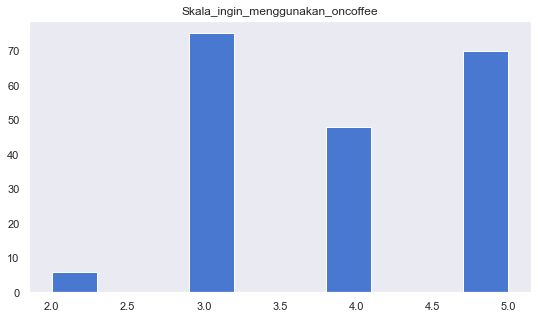

In [20]:
#Melihat histogram skala baik dari tidak tertarik maupun tertarik menggunakan website oncoffee
sns.set_palette('muted')
dataFrame.hist('Skala_ingin_menggunakan_oncoffee', figsize=(9, 5), grid=False)


Maka dapat disimpulkan bahwa ada kurang lebih 70 orang lebih yang sangat tertarik untuk menggunakan website On Coffee

array([[<AxesSubplot:title={'center':'Skala_peluncuran_oncoffee'}>]],
      dtype=object)

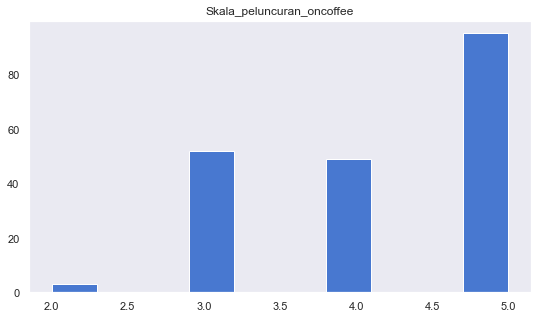

In [21]:
# Melihat histogram skala baik dari tidak tertarik maupun tertarik untuk peluncuran on website oncoffee
sns.set_palette('muted')
dataFrame.hist('Skala_peluncuran_oncoffee', figsize=(9, 5), grid=False)

Maka dapat disimpulkan bahwa ada sebanyak 80 orang lebih yang sangat tertarik dengan peluncuran website On Coffee

In [22]:
# Melabel isi dari skala untuk kemudian ditampilkan dengan plot
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(1, 'Sangat Tidak Tertarik')
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(2, 'Tidak Tertarik')
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(3, 'Cukup Tertarik')
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(4, 'Tertarik')
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(5, 'Sangat Tertarik')

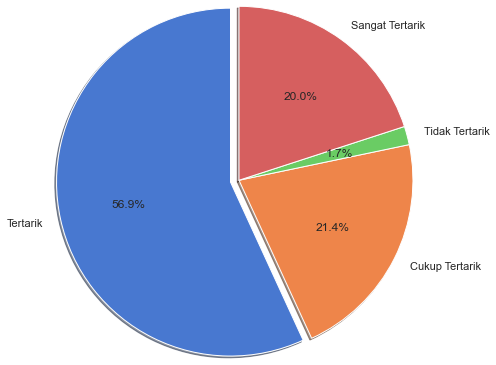

<Figure size 648x360 with 0 Axes>

In [23]:
# Melihat pie plot skala baik dari tidak tertarik maupun tertarik menggunakan website oncoffee
datapie = dataFrame['Skala_ingin_menggunakan_oncoffee'].unique()
data = []

for s in datapie:
    total = dataFrame['Skala_ingin_menggunakan_oncoffee'].str.count(s).sum()
    data.append([s, total])

data=pd.DataFrame(data, columns=['Skala_ingin_menggunakan_oncoffee','Total'])


value = data['Total']
labels = data['Skala_ingin_menggunakan_oncoffee']
explode = [0.1, 0, 0, 0]
plt.pie(value, labels=labels ,explode=explode, autopct='%1.1f%%', radius=2, shadow=True, startangle=90)
plt.figure(figsize=(9,5))
#plt.axes().set_aspect('equal')
plt.show()

Maka dapat disimpulkan bahwa sebanyak 56.9% tertarik untuk menggunakan website On Coffee dengan persentase 20.0% sangat tertarik, 56.9% tertarik, 21.4% cukup tertarik

In [24]:
# Melabel isi dari skala untuk kemudian ditampilkan dengan plot
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(1, 'Sangat tidak setuju')
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(2, 'Tidak setuju')
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(3, 'Netral')
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(4, 'Setuju')
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(5, 'Sangat setuju')

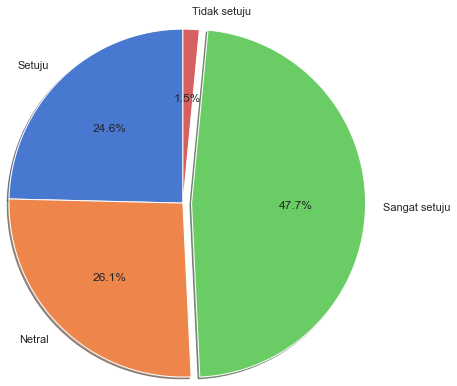

<Figure size 648x360 with 0 Axes>

In [25]:
# Melihat pie plot skala baik dari tidak tertarik maupun tertarik menggunakan website oncoffee
datapie = dataFrame['Skala_peluncuran_oncoffee'].unique()
data = []

for s in datapie:
    total = dataFrame['Skala_peluncuran_oncoffee'].str.count(s).sum()
    data.append([s, total])

data=pd.DataFrame(data, columns=['Skala_peluncuran_oncoffee','Total'])


value = data['Total']
labels = data['Skala_peluncuran_oncoffee']
explode = [0, 0, 0.1, 0]
plt.pie(value, labels=labels ,explode=explode, autopct='%1.1f%%', radius=2, shadow=True, startangle=90)
plt.figure(figsize=(9,5))
#plt.axes().set_aspect('equal')
plt.show()

Maka dapat disimpulkan bahwa sebanyak 57.0% tertarik dengan diluncurkannya website On Coffee dengan persentase 27.2% sangat tertarik, 57.0% tertarik, 14.9% cukup tertarik

In [26]:
# Melabel isi dari skala untuk kemudian ditampilkan dengan plot
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(to_replace='Sangat Tidak Tertarik', value =1)
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(to_replace='Tidak Tertarik', value =2)
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(to_replace='Cukup Tertarik', value =3)
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(to_replace='Tertarik', value =4)
dataFrame['Skala_ingin_menggunakan_oncoffee'] = dataFrame['Skala_ingin_menggunakan_oncoffee'].replace(to_replace='Sangat Tertarik', value =5)
dataFrame['Skala_ingin_menggunakan_oncoffee'].astype('int64');

In [27]:
# Melabel isi dari skala untuk kemudian ditampilkan dengan plot
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(to_replace='Sangat tidak setuju', value =1)
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(to_replace='Tidak setuju', value =2)
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(to_replace='Netral', value =3)
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(to_replace='Setuju', value =4)
dataFrame['Skala_peluncuran_oncoffee'] = dataFrame['Skala_peluncuran_oncoffee'].replace(to_replace='Sangat setuju', value =5)
dataFrame['Skala_peluncuran_oncoffee'].astype('int64');

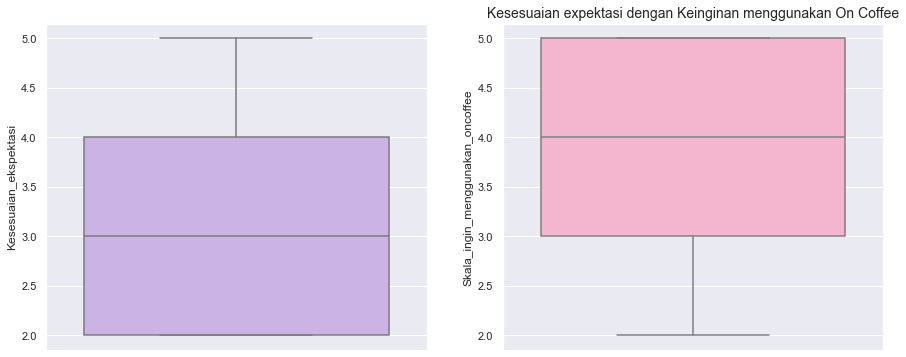

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataFrame['Kesesuaian_ekspektasi'], color='#CCAAEE')
plt.subplot(1,2,2)
sns.boxplot(y=dataFrame['Skala_ingin_menggunakan_oncoffee'], color='#FFAACC')
fontsize = 14
plt.title('Kesesuaian expektasi dengan Keinginan menggunakan On Coffee', fontsize=fontsize)
plt.show()

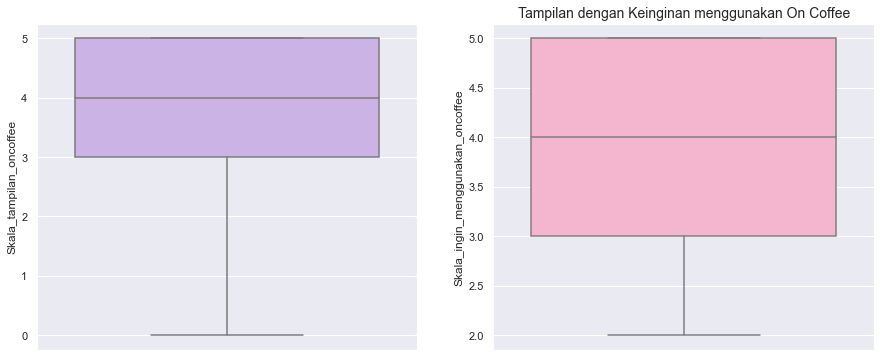

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataFrame['Skala_tampilan_oncoffee'], color='#CCAAEE')
plt.subplot(1,2,2)
sns.boxplot(y=dataFrame['Skala_ingin_menggunakan_oncoffee'], color='#FFAACC')
fontsize = 14
plt.title('Tampilan dengan Keinginan menggunakan On Coffee', fontsize=fontsize)
plt.show()

## On Coffee Analysis

Analisis hal yang berkaitan dengan website on coffee, termasuk ke dalam fitur yang akan dibuat serta hasil prototype website

Data Relation

In [30]:
# Define Function

def show_values_on_bars(axs, h_v='v', space=0.4):
    def _show_on_single_plot(ax):
        if h_v == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha='center') 
        elif h_v == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

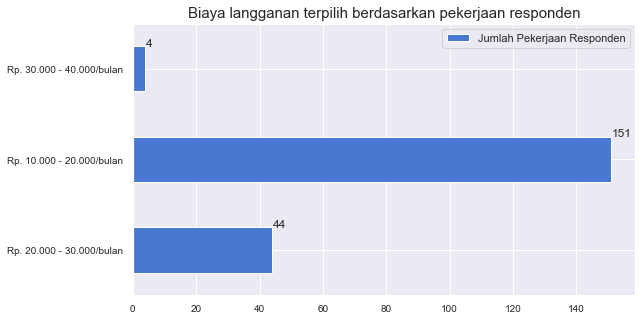

In [31]:
datawrk = dataFrame['Biaya_langganan'].unique()
data = []

for c in datawrk:
    d = dataFrame[dataFrame['Biaya_langganan'] == c]
    wrk = d['Pekerjaan'].count()
    data.append([c, wrk])

dt = pd.DataFrame(data, columns=['Biaya_langganan', 'wrk'])
dtbiayalangganan = []
dtwrk = []


for h in dt['Biaya_langganan']:
    dtbiayalangganan.append(h)

for j in dt['wrk']:
    dtwrk.append(j)

fontsize = 15
uisize = 10
dts = pd.DataFrame({'Jumlah Pekerjaan Responden': dtwrk}, index=dtbiayalangganan)
ax = dts.plot.barh(figsize=(9, 5), fontsize=uisize)
plt.title('Biaya langganan terpilih berdasarkan pekerjaan responden', fontsize=fontsize)

show_values_on_bars(ax, 'h', 0.10)

Maka dapat disumpulkan bahwa Biaya langganan terbanyak dipilih oleh responden berdasarkan pekerjaan yakni biaya langganan Rp. 10.000 - 20.000/bulan

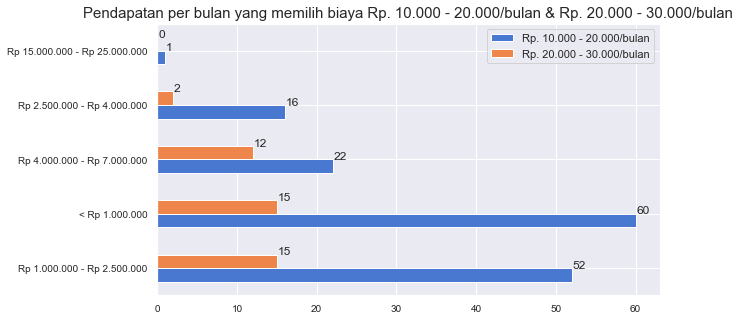

In [32]:
datawrk = dataFrame['Pendapatan_per_bulan'].unique()
data = []

for z in datawrk:
    d = dataFrame[dataFrame['Pendapatan_per_bulan'] == z]
    wrk = d['Biaya_langganan'].str.count('Rp. 10.000 - 20.000/bulan').sum()
    wrk2 = d['Biaya_langganan'].str.count('Rp. 20.000 - 30.000/bulan').sum()
    data.append([z, wrk, wrk2])

dt = pd.DataFrame(data, columns=['Pendapatan_per_bulan', 'wrk', 'wrk2'])
dtbiayalangganan = []
dtwrk = []
dtwrk2 = []


for a in dt['Pendapatan_per_bulan']:
    dtbiayalangganan.append(a)

for b in dt['wrk']:
    dtwrk.append(b)

for c in dt['wrk2']:
    dtwrk2.append(c)

fontsize = 15
uisize = 10
dts = pd.DataFrame({'Rp. 10.000 - 20.000/bulan': dtwrk, 'Rp. 20.000 - 30.000/bulan' : dtwrk2}, index=dtbiayalangganan)
ax = dts.plot.barh(figsize=(9, 5), fontsize=uisize)
plt.title('Pendapatan per bulan yang memilih biaya Rp. 10.000 - 20.000/bulan & Rp. 20.000 - 30.000/bulan', fontsize=fontsize)

show_values_on_bars(ax, 'h', 0.10)

Maka dapat disimpulkan bahwa Pendapatan per bulan responden yang memilih biaya Rp. 10.000 - 20.000/bulan & Rp. 20.000 - 30.000/bulan adalah responden yang memiliki penghasilan < Rp. 1.000.000

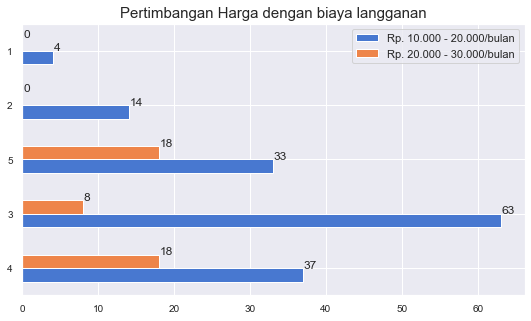

In [33]:
datawrk = dataFrame['Harga'].unique()
data = []

for z in datawrk:
    d = dataFrame[dataFrame['Harga'] == z]
    wrk = d['Biaya_langganan'].str.count('Rp. 10.000 - 20.000/bulan').sum()
    wrk2 = d['Biaya_langganan'].str.count('Rp. 20.000 - 30.000/bulan').sum()
    data.append([z, wrk, wrk2])

dt = pd.DataFrame(data, columns=['Harga', 'wrk', 'wrk2'])
dtbiayalangganan = []
dtwrk = []
dtwrk2 = []


for a in dt['Harga']:
    dtbiayalangganan.append(a)

for b in dt['wrk']:
    dtwrk.append(b)

for c in dt['wrk2']:
    dtwrk2.append(c)

fontsize = 15
uisize = 10
dts = pd.DataFrame({'Rp. 10.000 - 20.000/bulan': dtwrk, 'Rp. 20.000 - 30.000/bulan' : dtwrk2}, index=dtbiayalangganan)
ax = dts.plot.barh(figsize=(9, 5), fontsize=uisize)
plt.title('Pertimbangan Harga dengan biaya langganan', fontsize=fontsize)

show_values_on_bars(ax, 'h', 0.10)

Maka dapat disimpulkan bahwa yang memilih biaya layanan kebanyakan responden yang memperhatikan harga saat berkunjung ke coffeshop

In [34]:
# Melabel isi dari skala untuk kemudian ditampilkan dengan plot
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(1, 'Sangat Buruk')
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(2, 'Buruk')
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(3, 'Normal')
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(4, 'Bagus')
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(5, 'Sangat Bagus')

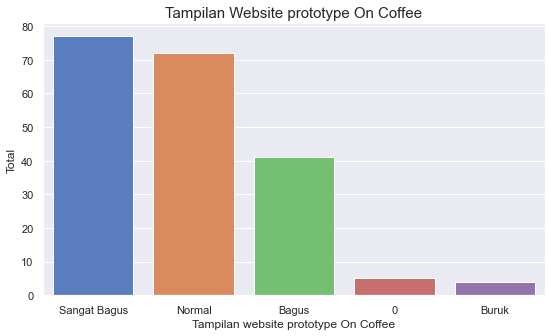

In [35]:
barbar = dataFrame.Skala_tampilan_oncoffee.value_counts()
sns.set_palette('muted')
plt.figure(figsize=(9,5))
sns.barplot(x=barbar.index, y=barbar.values)

fontsize = 15
plt.xlabel('Tampilan website prototype On Coffee')
plt.ylabel('Total')
plt.title('Tampilan Website prototype On Coffee', fontsize=fontsize)
plt.show()

Maka dapat disimpulkan bahwa 70 lebih responden menilai tampilan website On Coffee sangat bagus

In [36]:
# Melabel isi dari skala untuk kemudian ditampilkan dengan plot
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(to_replace='Sangat Buruk', value =1)
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(to_replace='Buruk', value =2)
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(to_replace='Normal', value =3)
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(to_replace='Bagus', value =4)
dataFrame['Skala_tampilan_oncoffee'] = dataFrame['Skala_tampilan_oncoffee'].replace(to_replace='Sangat Bagus', value =5)
dataFrame['Skala_tampilan_oncoffee'].astype('int64');

In [37]:
# Melabel isi dari skala untuk kemudian ditampilkan dengan plot
dataFrame['Skala_fitur_oncoffee'] = dataFrame['Skala_fitur_oncoffee'].replace(1, 'Sangat Buruk')
dataFrame['Skala_fitur_oncoffee'] = dataFrame['Skala_fitur_oncoffee'].replace(2, 'Buruk')
dataFrame['Skala_fitur_oncoffee'] = dataFrame['Skala_fitur_oncoffee'].replace(3, 'Normal')
dataFrame['Skala_fitur_oncoffee'] = dataFrame['Skala_fitur_oncoffee'].replace(4, 'Bagus')
dataFrame['Skala_fitur_oncoffee'] = dataFrame['Skala_fitur_oncoffee'].replace(5, 'Sangat Bagus')

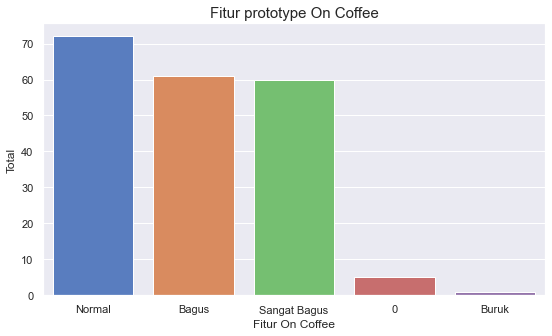

In [38]:
barbar = dataFrame.Skala_fitur_oncoffee.value_counts()
sns.set_palette('muted')
plt.figure(figsize=(9,5))
sns.barplot(x=barbar.index, y=barbar.values)

fontsize = 15
plt.xlabel('Fitur On Coffee')
plt.ylabel('Total')
plt.title('Fitur prototype On Coffee', fontsize=fontsize)
plt.show()

Maka dapat disimpulkan bahwa 70 lebih responden menilai fitur website On Coffee normal

,Mengunjungi_coffee_shop/minggu,Kesesuaian_ekspektasi,Harga,Jarak_untuk_mengunjungi_coffeshop,Skala_tampilan_oncoffee,Skala_peluncuran_oncoffee,Skala_ingin_menggunakan_oncoffee
Mengunjungi_coffee_shop/minggu,1.000000,0.135817,-0.018545,0.109602,-0.000560,0.044602,0.136816
Kesesuaian_ekspektasi,0.135817,1.000000,0.082686,0.268836,0.111743,0.297412,0.300110
Harga,-0.018545,0.082686,1.000000,0.443952,0.413348,0.336877,0.275284
Jarak_untuk_mengunjungi_coffeshop,0.109602,0.268836,0.443952,1.000000,0.200874,0.499854,0.484888
Skala_tampilan_oncoffee,-0.000560,0.111743,0.413348,0.200874,1.000000,0.548306,0.486518
Skala_peluncuran_oncoffee,0.044602,0.297412,0.336877,0.499854,0.548306,1.000000,0.708815
Skala_ingin_menggunakan_oncoffee,0.136816,0.300110,0.275284,0.484888,0.486518,0.708815,1.000000


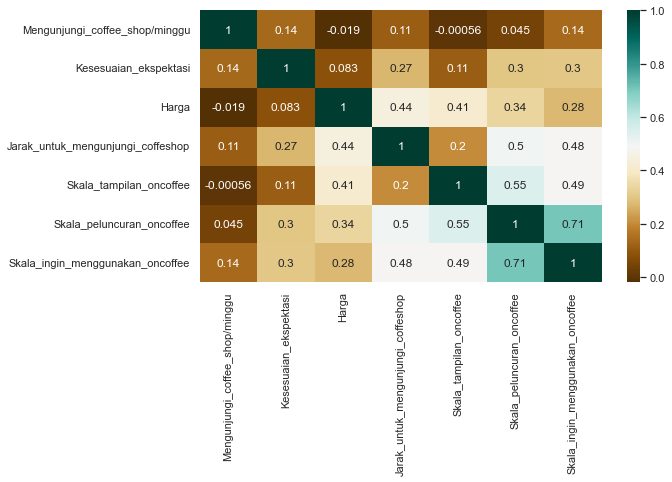

In [39]:
plt.figure(figsize=(9,5))
c = dataFrame.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

## Customer Segmentations

Menggunakan algoritma K-Means dengan beberapa atribut seperti penghasilan, umur dan skala ingin menggunakan On Coffee (seberapa tertarik responden untuk menggunakan website On Coffee)

In [40]:
dataFrame['Pendapatan_per_bulan']

0      Rp 1.000.000 - Rp 2.500.000
1                   < Rp 1.000.000
2                   < Rp 1.000.000
3      Rp 1.000.000 - Rp 2.500.000
4      Rp 4.000.000 - Rp 7.000.000
                  ...             
194    Rp 1.000.000 - Rp 2.500.000
195                 < Rp 1.000.000
196                 < Rp 1.000.000
197                 < Rp 1.000.000
198                 < Rp 1.000.000
Name: Pendapatan_per_bulan, Length: 199, dtype: object

In [41]:
dataFramebaru = dataFrame[['Skala_peluncuran_oncoffee', 'Skala_ingin_menggunakan_oncoffee', 'Pendapatan_per_bulan']].copy()

In [42]:
dataFramebaru['Pendapatan_per_bulan'] = dataFramebaru['Pendapatan_per_bulan'].str.replace(r'\D', '').astype(float)
#dataFramebaru['Skala_peluncuran_oncoffee'] = dataFramebaru['Skala_peluncuran_oncoffee'].str.replace(r'\D', '').astype('int64')

In [43]:
dataFramebaru.sample(15)

,Skala_peluncuran_oncoffee,Skala_ingin_menggunakan_oncoffee,Pendapatan_per_bulan
195,3,3,1.000000e+06
17,4,3,1.000000e+06
67,5,5,2.500000e+13
177,3,3,1.000000e+06
186,5,5,1.000000e+13
47,5,5,1.000000e+06
196,3,3,1.000000e+06
82,4,4,4.000001e+13
32,4,5,4.000001e+13
54,4,3,1.000000e+06


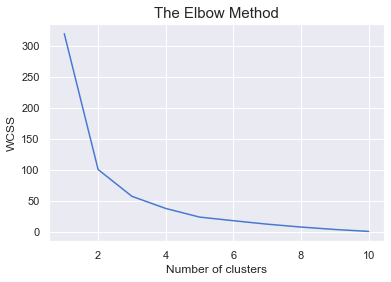

In [44]:
X = dataFramebaru.iloc[:, [0, 1]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

fontsize = 15
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize=fontsize)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

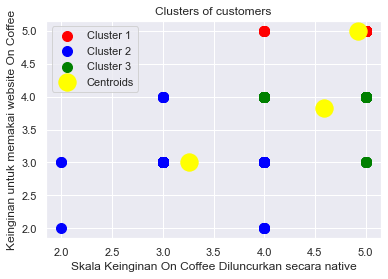

In [45]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Skala Keinginan On Coffee Diluncurkan secara native')
plt.ylabel('Keinginan untuk memakai website On Coffee')
plt.legend()
plt.show()

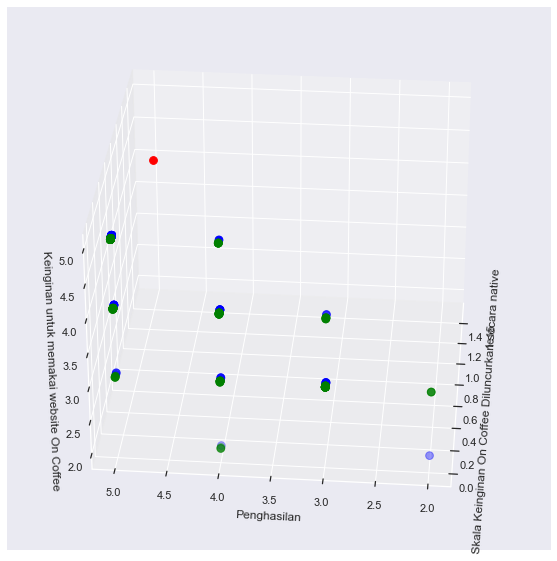

In [46]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(dataFramebaru.iloc[:, [0, 2]])
dataFramebaru['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataFramebaru.Pendapatan_per_bulan[dataFramebaru.label == 0], dataFramebaru['Skala_peluncuran_oncoffee'][dataFramebaru.label == 0], dataFramebaru['Skala_ingin_menggunakan_oncoffee'][dataFramebaru.label == 0], c='blue', s=60)
ax.scatter(dataFramebaru.Pendapatan_per_bulan[dataFramebaru.label == 1], dataFramebaru['Skala_peluncuran_oncoffee'][dataFramebaru.label == 1], dataFramebaru['Skala_ingin_menggunakan_oncoffee'][dataFramebaru.label == 1], c='red', s=60)
ax.scatter(dataFramebaru.Pendapatan_per_bulan[dataFramebaru.label == 2], dataFramebaru['Skala_peluncuran_oncoffee'][dataFramebaru.label == 2], dataFramebaru['Skala_ingin_menggunakan_oncoffee'][dataFramebaru.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel('Skala Keinginan On Coffee Diluncurkan secara native')
plt.ylabel('Penghasilan')
ax.set_zlabel('Keinginan untuk memakai website On Coffee')
plt.show()